**Running Time vs Sales Profit of movies**

This section dives into whether the running time of a movie has an effect on the overall Sales/profit of a movie?

With this I will use predictive analysis, machine learning, and regression models to figure out whether running time is a variable in this question.

<b>Loading Data into the Notebook</b> 

In [20]:
import pandas as pd 

df = pd.read_csv('/home/kumarbre/CMSE-Final-Project/movies_data.csv', encoding='ISO-8859-1')


In [21]:
print(df.head()) #prints out all the beginning of that data


print(df.info())


print(df.describe())


              Movie        Director  Running time          Actor 1  \
0          13 Hours     Michael Bay           144    Toby Stephens   
1         16 Blocks  Richard Donner           102     Bruce Willis   
2          17 Again     Burr Steers           102    Matthew Perry   
3              1982    Tommy Oliver            90  Bokeem Woodbine   
4  2 Fast 2 Furious  John Singleton           107      Paul Walker   

            Actor 2          Actor 3   Genre    Budget  Box Office  \
0  James Badge Dale  David Costabile  Action  50000000    69400000   
1       David Zayas       Sasha Roiz  Action  52000000    65000000   
2    Hunter Parrish    Thomas Lennon  Comedy  20000000   139000000   
3          Ruby Dee    Quinton Aaron   Drama   1000000     2000000   
4       Cole Hauser       Mo Gallini  Action  76000000   236000000   

   Actors Box Office %  Director Box Office %   Earnings  \
0                50.00                  69.23   19400000   
1                33.33                

After displaying the information shown within the dataset we see there are 3,,974 movies and we also see the charecteristics and performence of the movies. The average runtime is about 110 minutes with most movies lasting between 95 and 120 minutes, although there are some outliers that extend beyond 330 minutes. The median budget was around 22 million whereas the median box office earning was 43 million indicating most movies operate on a normal scale. Profitability also varies with some movies losing up to 300 million but some gaining 20 million in earnings. Awards are rare, as most films receive no nominations or wins, though a few high-profile movies stand out with up to 22 nominations and 13 wins. Overall, the data highlights trends in runtime, profitability, and critical recognition, with blockbusters and award-winning films being notable exceptions.

<b> Identifying Missing Values in Dataset Columns </b>

In [22]:
print(df.isnull().sum()) #show which columns have missing info which is important for the codes to run


Movie                                  0
Director                               0
Running time                           0
Actor 1                                0
Actor 2                                0
Actor 3                                2
Genre                                  0
Budget                                 0
Box Office                             0
Actors Box Office %                    0
Director Box Office %                  0
Earnings                               0
Oscar and Golden Globes nominations    0
Oscar and Golden Globes awards         3
Release year                           0
IMDb score                             0
dtype: int64


In [23]:
# Find duplicates
print(df.duplicated().sum()) 

# Drop duplicates
df = df.drop_duplicates()


24


<b>  Saving Cleaned Data and Calculating Correlations Between Key Metrics </b>

In [24]:
df.to_csv('/home/kumarbre/CMSE-Final-Project/cleaned_movies_data.csv', index=False)


In [25]:
import pandas as pd

# Calculate correlations
correlations = df[['Running time', 'Box Office', 'Earnings', 'IMDb score', 'Oscar and Golden Globes awards']].corr()
print(correlations)


                                Running time  Box Office  Earnings  \
Running time                        1.000000    0.265614  0.234145   
Box Office                          0.265614    1.000000  0.980359   
Earnings                            0.234145    0.980359  1.000000   
IMDb score                          0.364180    0.199884  0.228195   
Oscar and Golden Globes awards      0.281866    0.200143  0.238526   

                                IMDb score  Oscar and Golden Globes awards  
Running time                      0.364180                        0.281866  
Box Office                        0.199884                        0.200143  
Earnings                          0.228195                        0.238526  
IMDb score                        1.000000                        0.338957  
Oscar and Golden Globes awards    0.338957                        1.000000  


The correlation matirx reveals the relationship between the various variables in the dataset. As seen there is a strong positive correlation (0.98) between box office and earnings indicating that the higher the box office revenues the closer they are tieed to increase earnings. Running time shows a weak to moderate positive correlation with IMDb score 0.36 and Awards 0.28 which suggests that longer movies slightly favor critical acclaim or better ratings. Meanwhile IMDb scores have a moderate positive correlation with awars (0.34) indicating that critically acclaimed films tend to acclaim more awards. 

<b> Visualizing Relationships Between Running Time, Box Office, and IMDb Scores  </b>

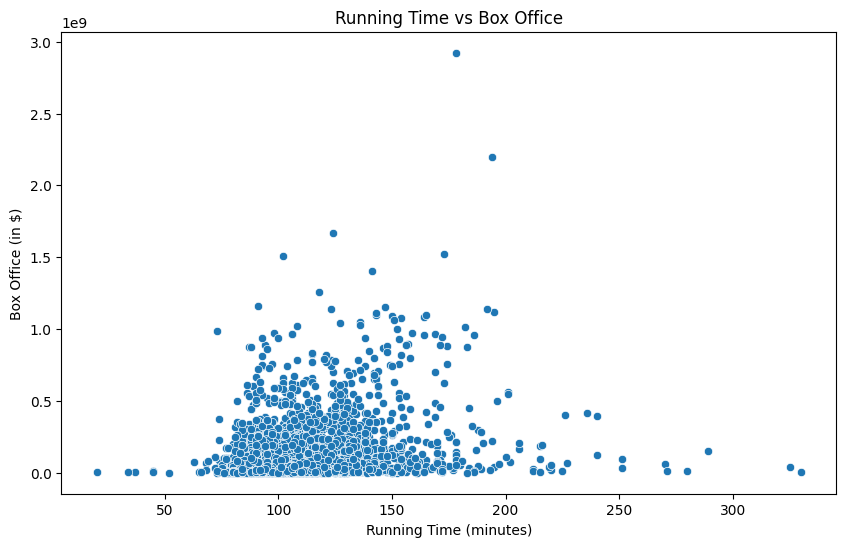

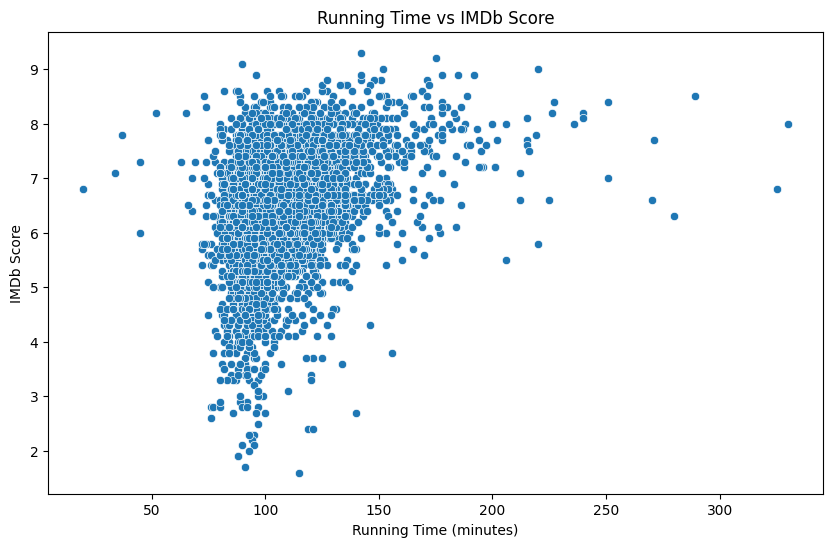

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Running Time vs Box Office
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Running time', y='Box Office')
plt.title('Running Time vs Box Office')
plt.xlabel('Running Time (minutes)')
plt.ylabel('Box Office (in $)')
plt.show()

# Scatter plot for Running Time vs IMDb Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Running time', y='IMDb score')
plt.title('Running Time vs IMDb Score')
plt.xlabel('Running Time (minutes)')
plt.ylabel('IMDb Score')
plt.show()

# Define running time categories
bins = [0, 90, 120, 180, 500]
labels = ['<90 min', '90-120 min', '120-180 min', '>180 min']
df['Running Time Category'] = pd.cut(df['Running time'], bins=bins, labels=labels)


Top Plot: Running Time vs Box Office
The first plot suggests that there is no strong linear relationship between running time and box office revenue. Most of the movies fall between the range of 90-150 minutes and generate a variety of box office revenues. Some longer movies appear to have higher earnings above 200 minutes but the trend is inconsistent and other variables could play a bigger factor in determining box office success. 

Bottom Plot: Running Time vs. IMDb Score
The second plot explores the relationship between running time and IMDb scores. The data indicates a weak positive correlation, with IMDb scores slightly increasing for movies in the range of 100–150 minutes. However, there is significant scatter in the data, meaning movies with both high and low IMDb scores exist across a wide range of running times. This suggests that while running time may have a modest impact on IMDb scores it is not a dominant factor.


<b> Analyzing Box Office and IMDb Scores Across Running Time Categories </b>

In [27]:
# Define running time categories
bins = [0, 90, 120, 180, 500]
labels = ['<90 min', '90-120 min', '120-180 min', '>180 min']
df['Running Time Category'] = pd.cut(df['Running time'], bins=bins, labels=labels)


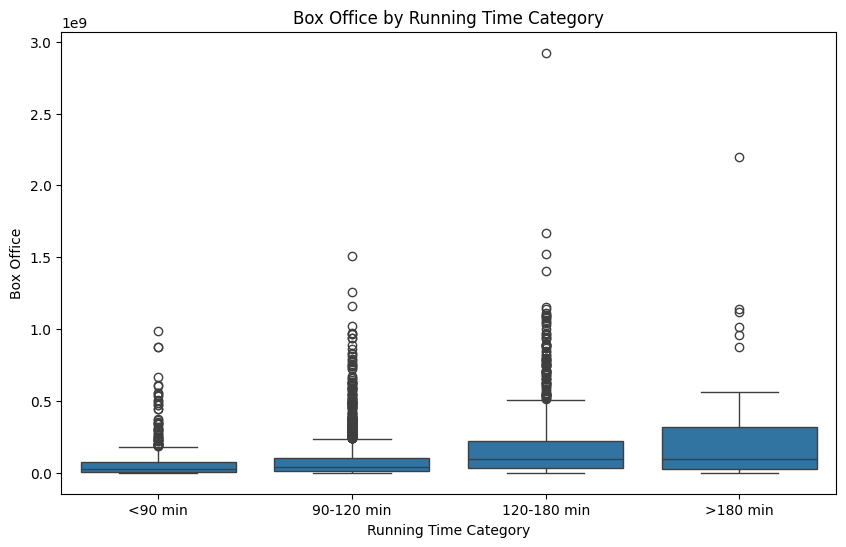

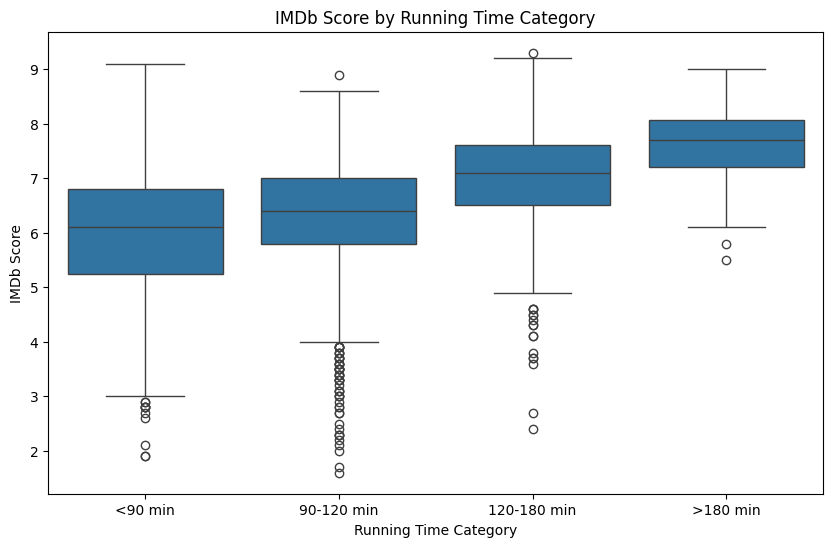

In [28]:
# Box plot for Running Time Category vs Box Office
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Running Time Category', y='Box Office')
plt.title('Box Office by Running Time Category')
plt.xlabel('Running Time Category')
plt.ylabel('Box Office')
plt.show()

# Box plot for Running Time Category vs IMDb Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Running Time Category', y='IMDb score')
plt.title('IMDb Score by Running Time Category')
plt.xlabel('Running Time Category')
plt.ylabel('IMDb Score')
plt.show()


In the top plot, Box Office by Running Time Category, movies under 90 minutes tend to have lower box office revenues, though there are a few successful outliers. Movies between 90–120 minutes show a higher median revenue and more blockbuster outliers, while the 120–180 minute range has similar median revenues but more high-revenue outliers, indicating that some longer movies can have success.. Movies longer than 180 minutes have a broad revenue range but a median similar to the 120–180 minute category. This suggests that the 90–180 minute range is optimal for success, although running time alone doesn’t guarantee high revenue.

In the bottom plot, IMDb Score by Running Time Category, movies under 90 minutes tend to have lower median scores with a wide range of ratings and some outliers. Movies in the 90–120 minute category have slightly higher median scores, while the 120–180 minute range shows the highest median IMDb scores with a narrower spread, indicating more consistent quality. Movies over 180 minutes show both high and low scores, suggesting greater variability. Overall, longer movies (120–180 minutes) tend to receive higher IMDb ratings, possibly due to perceived higher quality or more engaging storyline.




<b> Analyzing Awards by Running Time Category  </b>

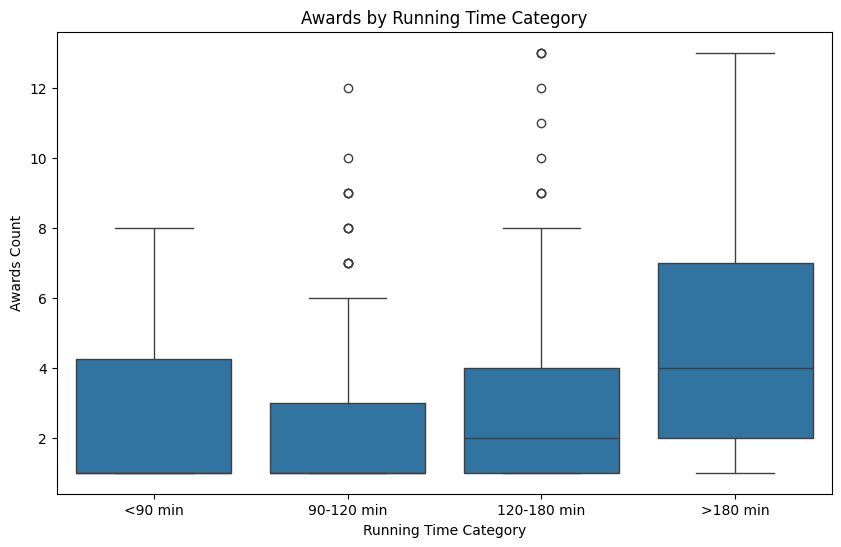

In [29]:
# Filter for movies with awards
award_winning_movies = df[df['Oscar and Golden Globes awards'] > 0]


plt.figure(figsize=(10, 6))
sns.boxplot(data=award_winning_movies, x='Running Time Category', y='Oscar and Golden Globes awards')
plt.title('Awards by Running Time Category')
plt.xlabel('Running Time Category')
plt.ylabel('Awards Count')
plt.show()


<b> Performing Simple Linear Regression with Statsmodels: Predicting Box Office from Running Time </b>

In [30]:
import statsmodels.api as sm


X = df[['Running time']]  # Predictor variable (Running time)
X = sm.add_constant(X)  
y = df['Box Office']  # Dependent variable (Box Office)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Box Office   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     299.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           9.03e-65
Time:                        14:23:06   Log-Likelihood:                -80548.
No. Observations:                3950   AIC:                         1.611e+05
Df Residuals:                    3948   BIC:                         1.611e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.248e+08   1.38e+07     -9.069   

The regression analysis indicates that running time explains only 7.1% of the variability in box office revenue, suggesting it is a weak predictor. The model's F-statistic (299.7) and its associated p-value (9.03e-65) indicate that the relationship between running time and box office revenue is statistically significant. The coefficient for running time (2,122,000) indicates that for every additional minute of running time, box office revenue increases by approximately $2.12 million. Both the intercept and running time are statistically significant with p-values of 0.000. The confidence interval for the running time coefficient, ranging from 1.88 million to 2.36 million, further supports the positive relationship between running time and box office revenue.

 <b> Predicting IMDb Ranking and Box Office Performance for a New Movie </b>

In [31]:
# Define "top 50 IMDb score" and "high earning" based on thresholds
top_50_threshold = df['IMDb score'].nlargest(50).iloc[-1]  # Find the 50th highest IMDb score
high_earning_threshold = df['Box Office'].quantile(0.75)  # Top 25% of box office earnings

df['Top 50 IMDb'] = df['IMDb score'] >= top_50_threshold  # 1 if top 50 IMDb score, else 0
df['High Earning'] = df['Box Office'] >= high_earning_threshold  # 1 if high earnings, else 0


  <b> Exploring the Relationship Between Running Time and Box Office Revenue </b>

Running time    0
Box Office      0
dtype: int64
Correlation coefficient between running time and box office: 0.26535705424463063


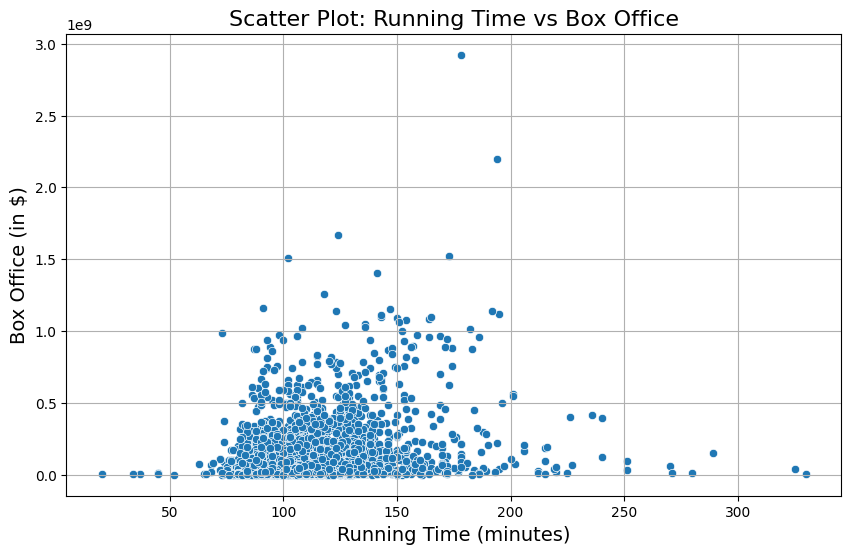

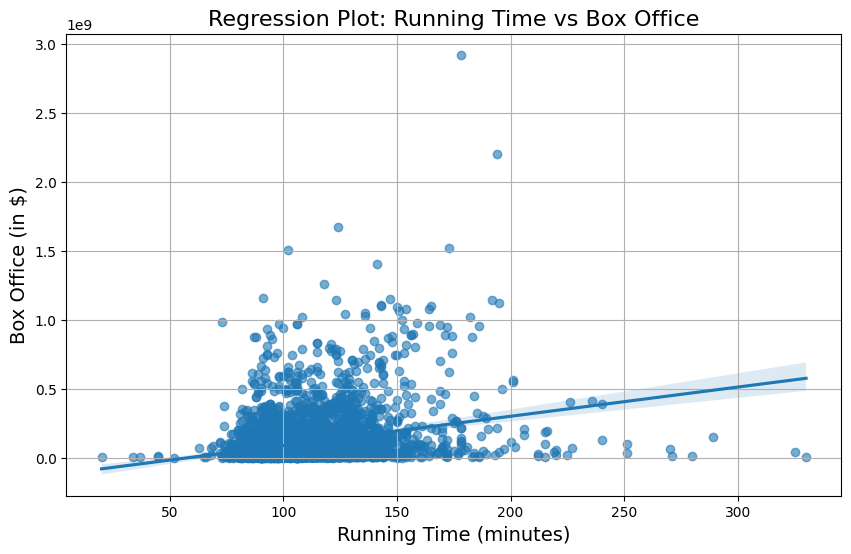

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/home/kumarbre/CMSE-Final-Project/movies_data.csv', encoding='ISO-8859-1')

# Check for missing values in relevant columns
print(df[['Running time', 'Box Office']].isnull().sum())

# Drop rows with missing values in the relevant columns
df_cleaned = df[['Running time', 'Box Office']].dropna()

# Calculate correlation coefficient
correlation = df_cleaned['Running time'].corr(df_cleaned['Box Office'])
print(f"Correlation coefficient between running time and box office: {correlation}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Running time', y='Box Office')
plt.title('Scatter Plot: Running Time vs Box Office', fontsize=16)
plt.xlabel('Running Time (minutes)', fontsize=14)
plt.ylabel('Box Office (in $)', fontsize=14)
plt.grid(True)
plt.show()

# Visualize the trend using a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Running time', y='Box Office', scatter_kws={'alpha': 0.6})
plt.title('Regression Plot: Running Time vs Box Office', fontsize=16)
plt.xlabel('Running Time (minutes)', fontsize=14)
plt.ylabel('Box Office (in $)', fontsize=14)
plt.grid(True)
plt.show()


The scatter plot visualizes the relationship between running time (in minutes) and box office earnings (in dollars) for a collection of movies. The data points are dispersed across the plot, indicating a lack of a strong, linear relationship between the two variables. The Pearson correlation coefficient of 0.26 further confirms this, suggesting a weak positive correlation. This means that while there may be a slight trend where longer movies tend to earn slightly higher box office revenues, the connection is not significant.

The regression plot, which includes a fitted regression line, supports this weak positive correlation. The blue line represents the best-fit line, and the shaded region around it shows the confidence interval, indicating the uncertainty of the predictions. The positive slope of the line reflects the small tendency for longer movies to earn more, but the weak correlation highlights that running time is not a strong predictor of box office performance. Other factors, such as movie genre, marketing, and star power, likely play a more significant role in determining a movie's success.




<b>Predicting Movie Profit Using Random Forest Regressor </b>

Mean Squared Error: 1.4363061914717066e+16
R-squared Score: 0.34692052569733567


/tmp/ipykernel_870129/1776721621.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


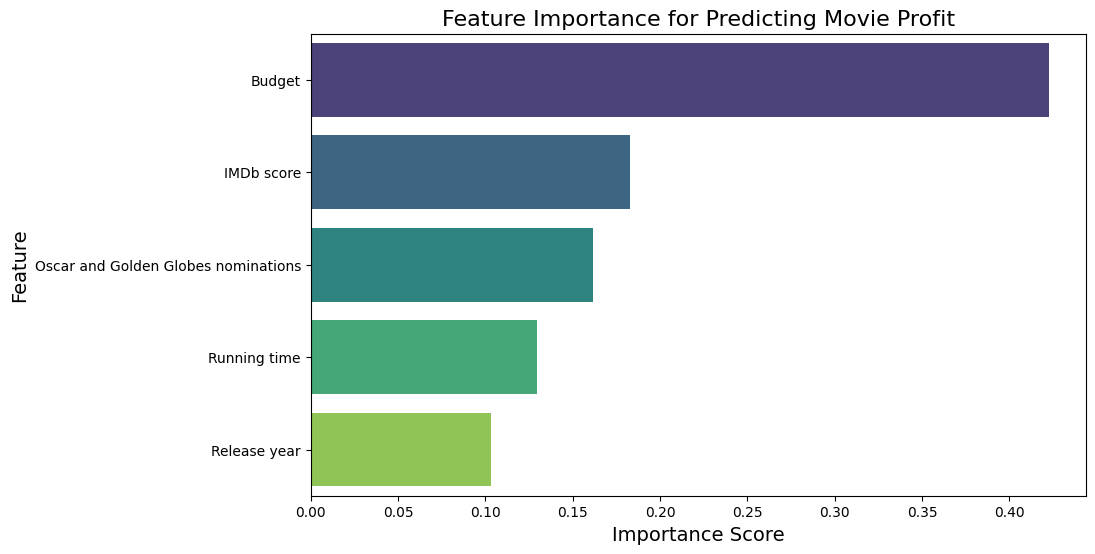

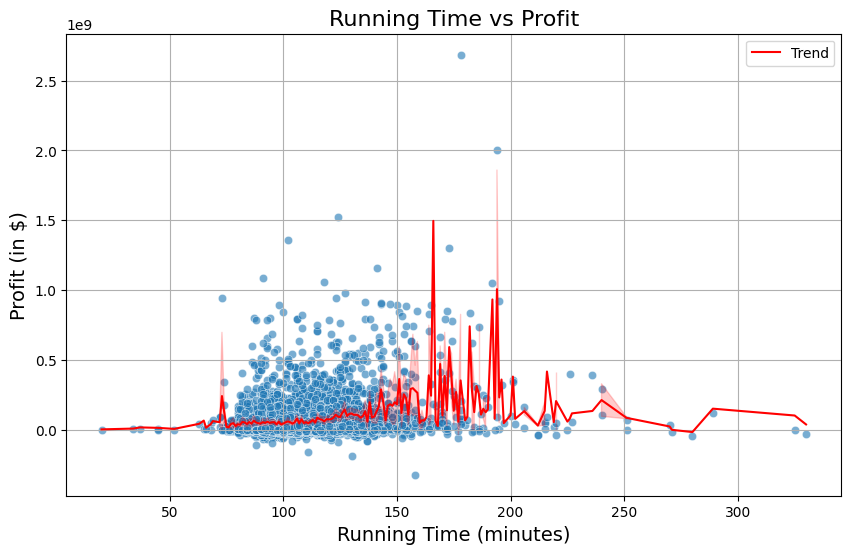

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/home/kumarbre/CMSE-Final-Project/movies_data.csv', encoding='ISO-8859-1')

# Calculate profit by subtracting Budget from Box Office
df['Profit'] = df['Box Office'] - df['Budget']  

# Define the features and target variable
features = ['Running time', 'Budget', 'IMDb score', 'Oscar and Golden Globes nominations', 'Release year']
target = 'Profit'


df_cleaned = df[features + [target]].dropna()

# Train-test split: 80% training, 20% testing
X = df_cleaned[features]
y = df_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model performance using Mean Squared Error and R-squared Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Calculate feature importances from the model and sort them
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importances in a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Predicting Movie Profit', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

# Visualize the relationship between Running Time and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Running time', y='Profit', alpha=0.6)
sns.lineplot(data=df_cleaned, x='Running time', y=model.predict(X), color='red', label='Trend')
plt.title('Running Time vs Profit', fontsize=16)
plt.xlabel('Running Time (minutes)', fontsize=14)
plt.ylabel('Profit (in $)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


#Chat GPT 2024 11/10/2024 "How would the prediction modeling be used in terms of variables with machine learning"

The model's performance, indicated by the Mean Squared Error (MSE) of approximately 1.44e+16, suggests significant prediction errors, with the model struggling to accurately predict movie profit. The R-squared score of 0.35 indicates that only about 35% of the variability in profit is explained by the features, highlighting the model's limited explanatory power. The feature importance analysis reveals that budget, IMDb score, and Oscar/Golden Globe nominations are the most influential predictors of profit, while running time and release year have minimal impact. The scatter plot with a trendline further confirms that running time has a weak relationship with profit, with no clear pattern emerging.